### Projekat iz predmeta *Tehnike i metode analize podataka* u saradnji sa firmom *Nissatech*

#### Importovanje biblioteka

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import matplotlib.cm as cm
import warnings

In [12]:
warnings.filterwarnings('ignore')

#### Učitavanje podataka

In [113]:
data = pd.read_csv("running_data.csv")

In [3]:
data.head(10)

,time,ax_Nenad Second Runner,ay_Nenad Second Runner,az_Nenad Second Runner,ax_Nenad Third Runner,ay_Nenad Third Runner,az_Nenad Third Runner,ax_Nenad First Runner,ay_Nenad First Runner,az_Nenad First Runner,ax_Nenad Stojanovic,ay_Nenad Stojanovic,az_Nenad Stojanovic,hr
0,0.00,9.196875,-0.864380,-2.452500,-3.832031,7.658223,-3.065625,-2.145937,-7.491992,-5.211563,9.642020,-0.781105,-0.153281,56.0
1,0.02,9.196875,-0.801171,-2.452500,-3.832031,7.541438,-3.065625,-2.145937,-7.510781,-5.211563,9.566430,-0.856695,-0.153281,56.0
2,0.04,9.196875,-0.766406,-2.452500,-3.832031,7.510781,-3.065625,-2.145937,-7.510781,-5.211563,9.604921,-0.818204,-0.051798,56.0
3,0.06,9.196875,-0.699948,-2.452500,-3.832031,7.510781,-3.015991,-1.992656,-7.510781,-5.058281,9.656719,-0.766406,-0.048626,56.0
4,0.08,9.179725,-0.749257,-2.605781,-3.832031,7.510781,-2.912344,-2.238136,-7.571864,-5.211563,9.656719,-0.617352,-0.153281,56.0
5,0.10,9.164718,-0.734250,-2.605781,-3.832031,7.510781,-2.912344,-2.145937,-7.510781,-5.120516,9.656719,-0.766406,-0.153281,56.0
6,0.12,9.268692,-0.613125,-2.452500,-3.832031,7.604210,-2.912344,-2.145937,-7.510781,-5.211563,9.656719,-0.809748,0.000000,56.0
7,0.14,9.219385,-0.766406,-2.452500,-3.888964,7.664062,-2.969277,-2.145937,-7.510781,-5.209257,9.656719,-0.775920,-0.143767,56.0
8,0.16,9.350156,-0.766406,-2.452500,-3.985313,7.684500,-3.086062,-2.020316,-7.385160,-5.058281,9.656719,-0.766406,-0.062370,56.0
9,0.18,9.196875,-0.766406,-2.605781,-3.985313,7.801286,-3.202848,-1.839375,-7.251597,-5.211563,9.627271,-0.766406,-0.029448,56.0


#### Podaci o datasetu

Početni skup podataka sadrži informacije o promeni vektora linearnog ubrzanja (vektor je trodimenzionalni: x, y i z-osa) u vremenu, pri čemu se istovremeno prikupljaju podaci u gorenavedenom obliku sa četiri različita senzora - dva senzora postavljena na zglobovima na nozi i dva na podlakticama. Pored ovoga početni skup nosi i informaciju o promeni otkucaja srca (heart rate) korisnika.

In [6]:
len(data)

330986

In [4]:
data.shape

(330986, 14)

Dakle, ovaj skup podataka ima 330.986 redova i 14 kolona. Svaki red predstavlja jedan uzorak ili tačku podataka, dok svaka kolona predstavlja atribut ili karakteristiku uzorka.

In [5]:
data.dtypes

time                      float64
ax_Nenad Second Runner    float64
ay_Nenad Second Runner    float64
az_Nenad Second Runner    float64
ax_Nenad Third Runner     float64
ay_Nenad Third Runner     float64
az_Nenad Third Runner     float64
ax_Nenad First Runner     float64
ay_Nenad First Runner     float64
az_Nenad First Runner     float64
ax_Nenad Stojanovic       float64
ay_Nenad Stojanovic       float64
az_Nenad Stojanovic       float64
hr                        float64
dtype: object

Svi tipovi podataka u datasetu su numerički.

In [7]:
data.isna().sum()

time                      0
ax_Nenad Second Runner    0
ay_Nenad Second Runner    0
az_Nenad Second Runner    0
ax_Nenad Third Runner     0
ay_Nenad Third Runner     0
az_Nenad Third Runner     0
ax_Nenad First Runner     0
ay_Nenad First Runner     0
az_Nenad First Runner     0
ax_Nenad Stojanovic       0
ay_Nenad Stojanovic       0
az_Nenad Stojanovic       0
hr                        0
dtype: int64

In [114]:
dups = data.duplicated()
print("Broj duplikata:", dups.sum())

Broj duplikata: 0


Dataset nema nedostajućih vrednosti i takođe nema duplikata.

#### Deskriptivna statistika

In [9]:
data.describe()

,time,ax_Nenad Second Runner,ay_Nenad Second Runner,az_Nenad Second Runner,ax_Nenad Third Runner,ay_Nenad Third Runner,az_Nenad Third Runner,ax_Nenad First Runner,ay_Nenad First Runner,az_Nenad First Runner,ax_Nenad Stojanovic,ay_Nenad Stojanovic,az_Nenad Stojanovic,hr
count,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000,330986.000000
mean,3309.850000,11.672466,2.810048,-2.965658,-5.484813,5.815294,-2.590918,-4.149759,-6.568779,-4.440364,11.526530,-4.171390,-4.030319,120.016322
std,1910.951449,5.074235,10.978000,3.320179,5.782400,4.917957,3.438443,6.575814,4.014194,3.888094,5.935203,9.053751,6.253116,19.546159
min,0.000000,-12.774835,-30.095370,-21.025501,-26.810294,-10.958429,-15.604521,-36.909541,-22.346339,-17.446864,-13.480556,-36.858856,-31.777819,56.000000
25%,1654.925000,8.549933,-3.188822,-4.873866,-9.702074,1.735535,-4.941776,-9.462030,-9.227531,-6.685457,7.202296,-9.810000,-7.510782,103.151979
50%,3309.850000,10.065470,2.329224,-3.184104,-7.217475,6.928313,-3.649885,-6.652793,-7.012874,-4.946336,9.503437,-3.315894,-3.217269,128.000000
75%,4964.775000,15.886458,8.867293,-0.891000,-1.261295,9.397989,-0.629475,1.226238,-4.402430,-2.759063,16.907011,0.200623,-0.220952,132.991849
max,6619.700000,43.431683,35.843953,18.400590,19.974251,24.864002,13.768188,17.712818,10.116563,12.081874,39.947452,21.237969,20.161493,149.000000


Analizom dataseta uočeno je da se komponenta time uvećava za 0,02s.

### 1. Korak

#### Vizualizacija podataka

Da bi se u potpunosti razumeo kontekst podataka trebalo bi izvršiti njihovu vizuelizaciju tako da se isprati promena linearnog ubrzanja u vremenu za različite senzore.

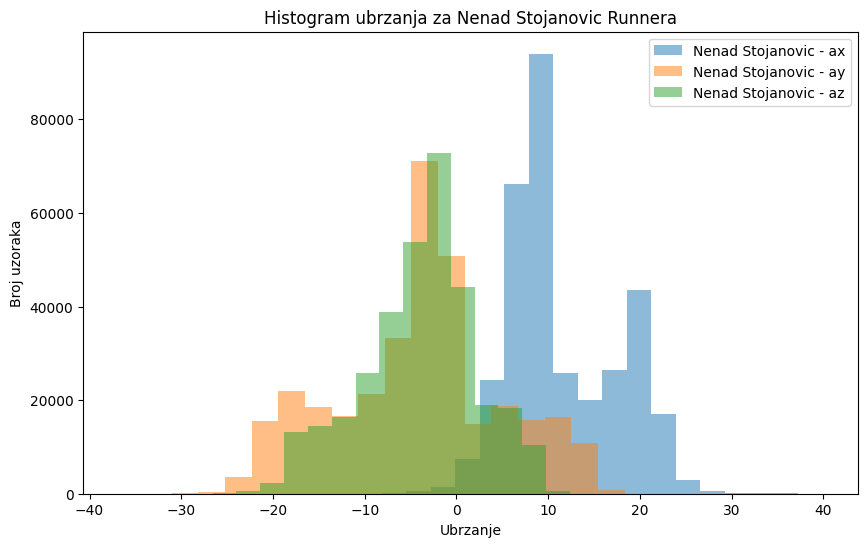

In [16]:
plt.figure(figsize=(10, 6))
for dimenzija in ['ax', 'ay', 'az']:
    plt.hist(data[f'{dimenzija}_Nenad Stojanovic'], bins=20, alpha=0.5, label=f'Nenad Stojanovic - {dimenzija}')
plt.xlabel('Ubrzanje')
plt.ylabel('Broj uzoraka')
plt.title('Histogram ubrzanja za Nenad Stojanovic Runnera')
plt.legend()
plt.show()

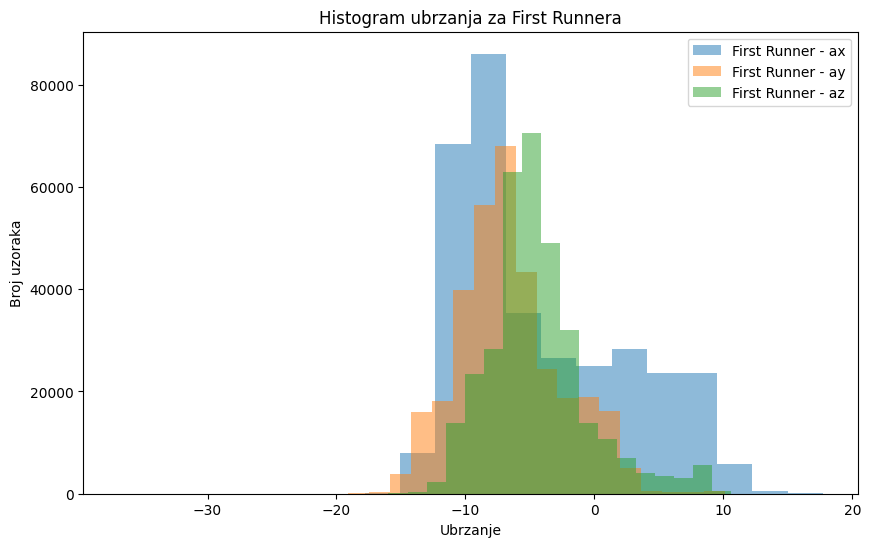

In [14]:
plt.figure(figsize=(10, 6))
for dimenzija in ['ax', 'ay', 'az']:
    plt.hist(data[f'{dimenzija}_Nenad First Runner'], bins=20, alpha=0.5, label=f'First Runner - {dimenzija}')
plt.xlabel('Ubrzanje')
plt.ylabel('Broj uzoraka')
plt.title('Histogram ubrzanja za First Runnera')
plt.legend()
plt.show()

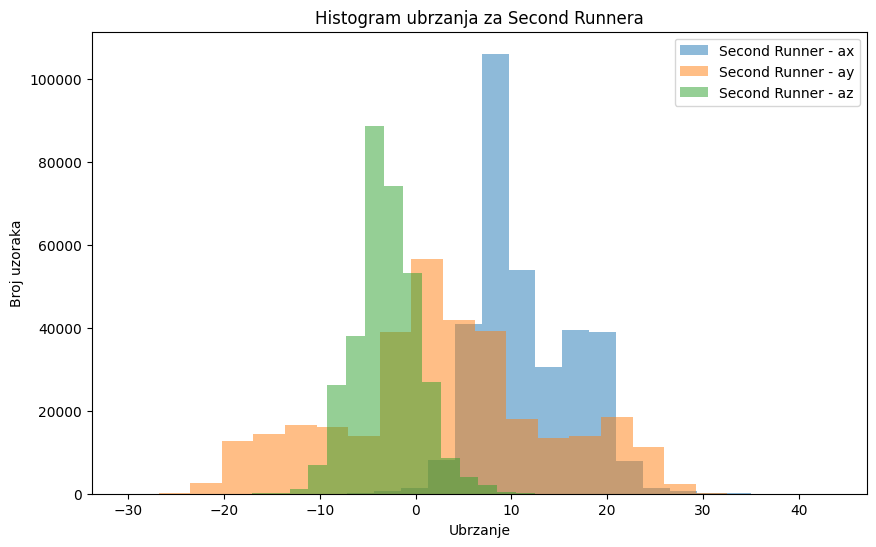

In [17]:
plt.figure(figsize=(10, 6))
for dimenzija in ['ax', 'ay', 'az']:
    plt.hist(data[f'{dimenzija}_Nenad Second Runner'], bins=20, alpha=0.5, label=f'Second Runner - {dimenzija}')
plt.xlabel('Ubrzanje')
plt.ylabel('Broj uzoraka')
plt.title('Histogram ubrzanja za Second Runnera')
plt.legend()
plt.show()

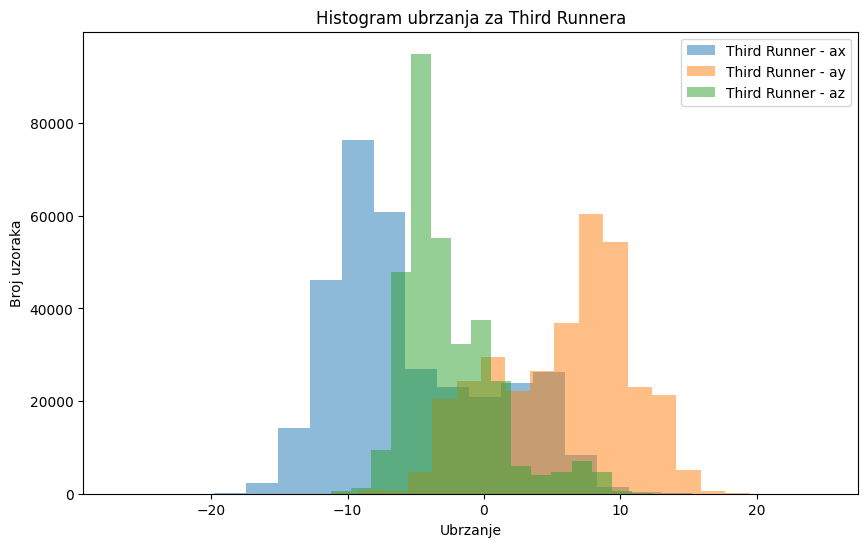

In [18]:
plt.figure(figsize=(10, 6))
for dimenzija in ['ax', 'ay', 'az']:
    plt.hist(data[f'{dimenzija}_Nenad Third Runner'], bins=20, alpha=0.5, label=f'Third Runner - {dimenzija}')
plt.xlabel('Ubrzanje')
plt.ylabel('Broj uzoraka')
plt.title('Histogram ubrzanja za Third Runnera')
plt.legend()
plt.show()

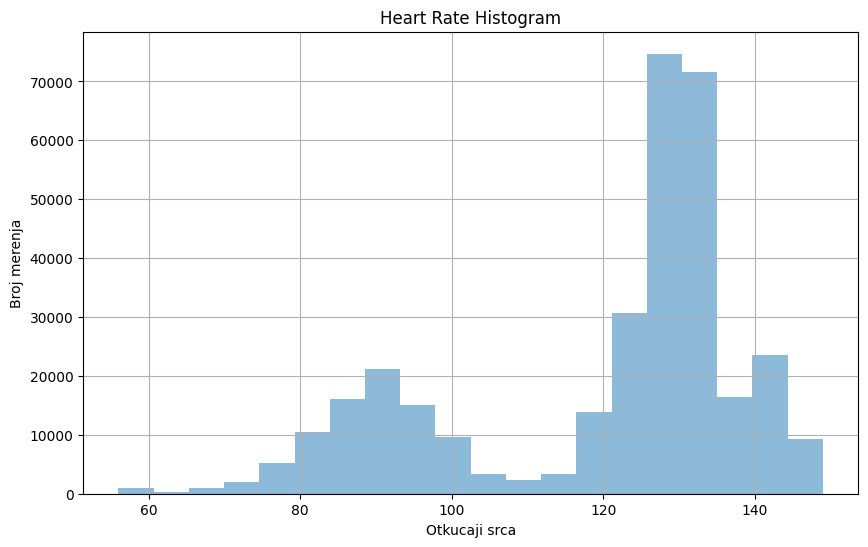

In [46]:
heart_rate = data['hr']

plt.figure(figsize=(10, 6))
plt.hist(heart_rate, bins=20,alpha=0.5) 
plt.xlabel('Otkucaji srca')
plt.ylabel('Broj merenja')
plt.title('Heart Rate Histogram')
plt.grid(True)
plt.show()

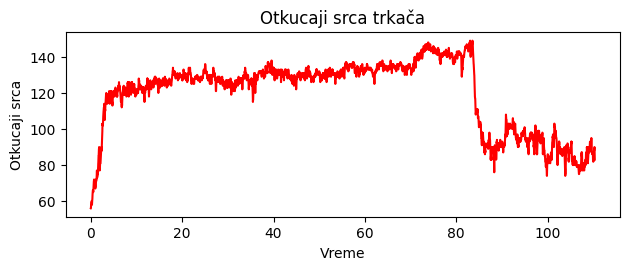

In [64]:
data['time_minutes'] = data['time'] / 60

runner_data = data[['time_minutes', 'hr']]

plt.subplot(2, 1, 2)
plt.plot(runner_data['time_minutes'],runner_data['hr'], color='red')
plt.xlabel('Vreme')
plt.ylabel('Otkucaji srca')
plt.title('Otkucaji srca trkača')

plt.tight_layout()
plt.show()

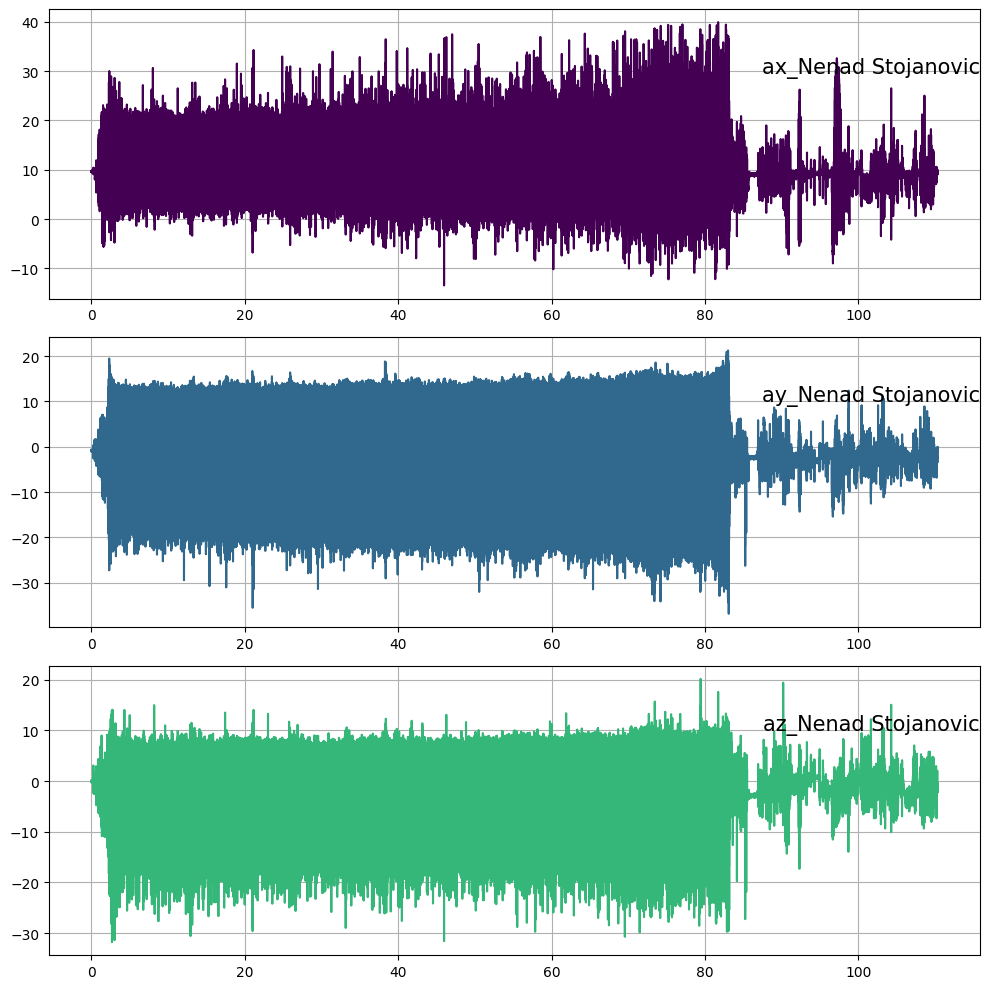

In [57]:
time_vals = ['ax_Nenad Stojanovic', 'ay_Nenad Stojanovic', 'az_Nenad Stojanovic']

fig, axs = plt.subplots(len(time_vals), 1, figsize=(10, 10), facecolor='white')

for i, (col, ax) in enumerate(zip(time_vals, axs)):
    ax.plot(data['time_minutes'], data[col].values, color=cm.viridis(i / len(time_vals)))
    ax.set_title(col, y=0.75, loc='right', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)

plt.tight_layout()
plt.show()

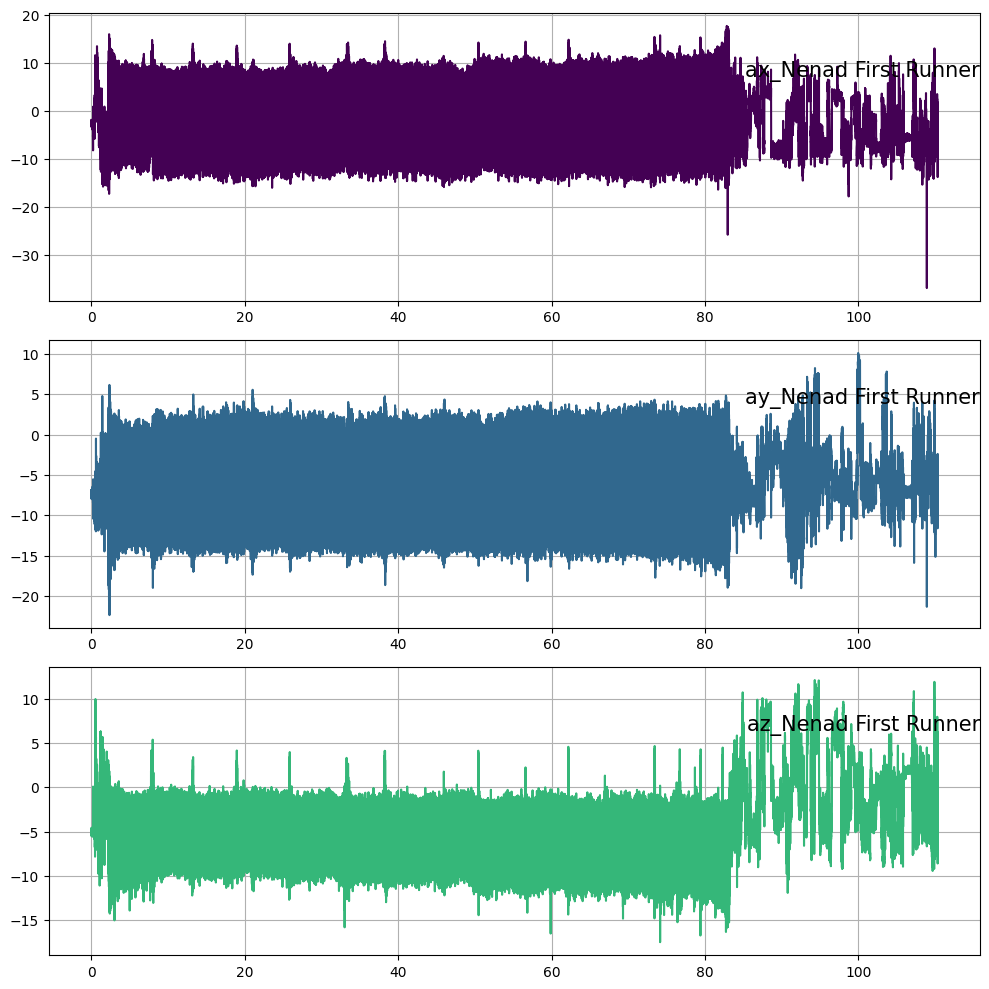

In [58]:
time_vals = ['ax_Nenad First Runner','ay_Nenad First Runner','az_Nenad First Runner']

fig, axs = plt.subplots(len(time_vals), 1, figsize=(10, 10), facecolor='white')

for i, (col, ax) in enumerate(zip(time_vals, axs)):
    ax.plot(data['time_minutes'], data[col].values, color=cm.viridis(i / len(time_vals)))
    ax.set_title(col, y=0.75, loc='right', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)

plt.tight_layout()
plt.show()

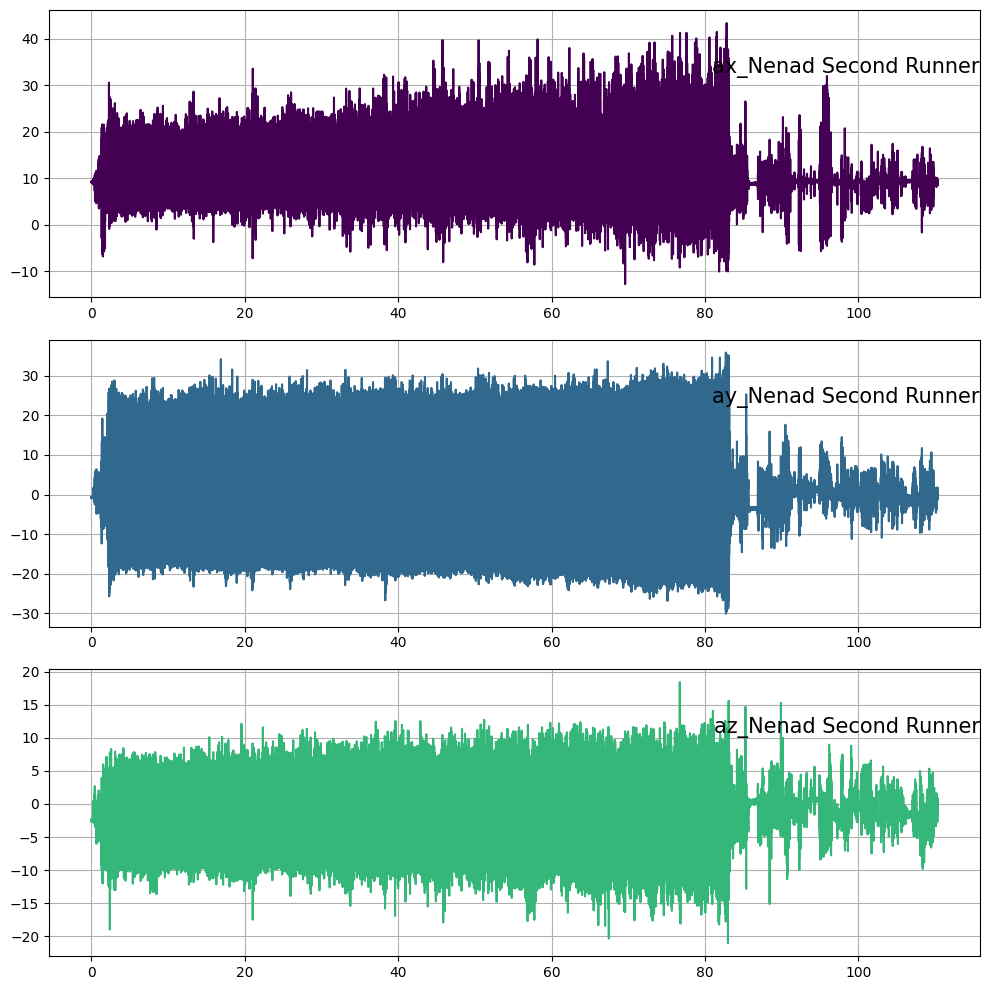

In [59]:
time_vals = ['ax_Nenad Second Runner','ay_Nenad Second Runner','az_Nenad Second Runner']

fig, axs = plt.subplots(len(time_vals), 1, figsize=(10, 10), facecolor='white')

for i, (col, ax) in enumerate(zip(time_vals, axs)):
    ax.plot(data['time_minutes'], data[col].values, color=cm.viridis(i / len(time_vals)))
    ax.set_title(col, y=0.75, loc='right', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)

plt.tight_layout()
plt.show()

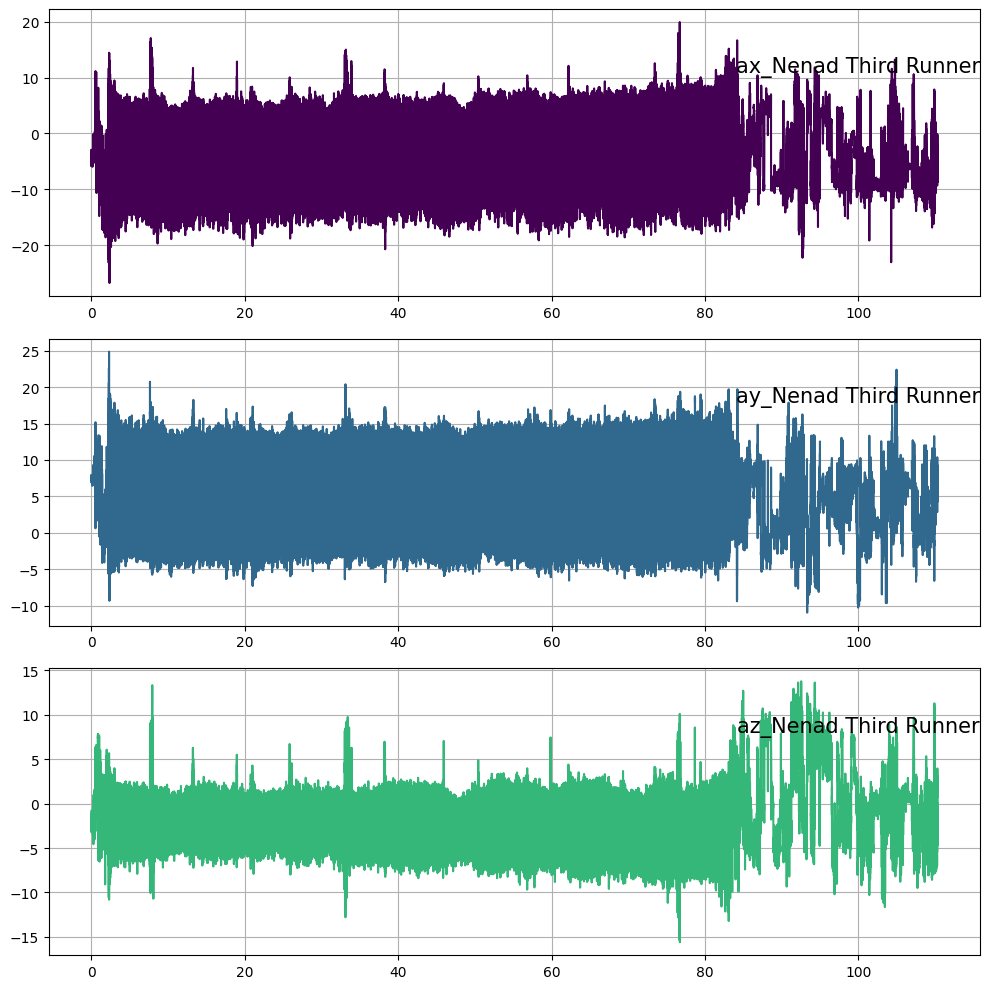

In [60]:
time_vals = ['ax_Nenad Third Runner','ay_Nenad Third Runner','az_Nenad Third Runner']

fig, axs = plt.subplots(len(time_vals), 1, figsize=(10, 10), facecolor='white')

for i, (col, ax) in enumerate(zip(time_vals, axs)):
    ax.plot(data['time_minutes'], data[col].values, color=cm.viridis(i / len(time_vals)))
    ax.set_title(col, y=0.75, loc='right', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)

plt.tight_layout()
plt.show()

Na osnovu vizualizacije promene ubrzanja trkača u vremenu već možemo da naslutimo koji senzor je bio na podkolenici a koji na nozi trkača.   
Vidimo da sličnu promenu u vremenu imaju senzori Second Runner i Stojanovic,First Runner i Third Runner.

Određivanje položaja senzora radi se na osnovu ispitivanja apsolutne srednje vrednosti longitudalne ili transferzalne komponente linearnog ubrzanja na intervalu za snimljeno trčanje u celini. Veće vrednosti odgovaraju nozi, a manje ruci

In [67]:
abs_data = data.applymap(abs)

In [70]:
abs_data.mean()

time                      3309.850000
ax_Nenad Second Runner      11.690350
ay_Nenad Second Runner       8.797332
az_Nenad Second Runner       3.680751
ax_Nenad Third Runner        7.079633
ay_Nenad Third Runner        6.517321
az_Nenad Third Runner        3.737256
ax_Nenad First Runner        6.998683
ay_Nenad First Runner        6.831284
az_Nenad First Runner        5.259727
ax_Nenad Stojanovic         11.555087
ay_Nenad Stojanovic          7.848324
az_Nenad Stojanovic          5.751004
hr                         120.016322
time_minutes                55.164167
dtype: float64

ax_Nenad Second Runner      11.690350   
ax_Nenad Stojanovic         11.555087    
ax_Nenad Third Runner        7.079633    
ax_Nenad First Runner        6.998683    

ay_Nenad Second Runner       8.797332    
ay_Nenad Stojanovic          7.848324    
ay_Nenad First Runner        6.831284    
ay_Nenad Third Runner        6.517321    

az_Nenad Stojanovic          5.751004   
az_Nenad First Runner        5.259727   
az_Nenad Third Runner        3.737256   
az_Nenad Second Runner       3.680751    

Na osnovu prosečnih vrednosti, možemo primetiti sledeće:   

Senzori za Second Runner i Stojanovic imaju relativno visoke prosečne vrednosti ubrzanja, što bi moglo ukazivati na to da su bili postavljeni na nozi.  
Senzori za First Runner i Third Runner imaju niže prosečne vrednosti ubrzanja, što bi moglo ukazivati na to da su bili postavljeni na podlaktici.    

Od početnog skupa podataka kreiramo dva nova fajla, jedan za akcelerometarske podatke sa jednog od senzora koji se nalazio na nozi korisnika, a drugi fajl bi sadržao podatke o promeni linearnog ubrzanja prikupljene sa jednog senzora koji je bio postavljen na podlaktici.

In [90]:
leg_data = data[['ax_Nenad Second Runner', 'ay_Nenad Second Runner', 'az_Nenad Second Runner']]
leg_data.to_csv('leg_data.csv', index=False)

arm_data = data[['ax_Nenad Third Runner', 'ay_Nenad Third Runner', 'az_Nenad Third Runner']]
arm_data.to_csv('arm_data.csv', index=False)

### 2. Korak

Za nove skupove podataka odrediti tip podataka svake kolone i njihove dimenzije. Primeniti deskriptivnu statistiku nad dobijenim skupovima podataka (average/mean, median, standard deviation, percentile). Odraditi i skaliranje (normalizaciju) podataka

In [154]:
leg_data = pd.read_csv('leg_data.csv')
arm_data = pd.read_csv('arm_data.csv')

In [92]:
print("Dimenzije za skup podataka sa senzorom na nozi:")
print(leg_data.shape)

Dimenzije za skup podataka sa senzorom na nozi:
(330986, 3)


In [93]:
print("Tipovi podataka za skup podataka sa senzorom na nozi:")
print(leg_data.dtypes)

Tipovi podataka za skup podataka sa senzorom na nozi:
ax_Nenad Second Runner    float64
ay_Nenad Second Runner    float64
az_Nenad Second Runner    float64
dtype: object


In [94]:
print("Dimenzije za skup podataka sa senzorom na podlaktici:")
print(arm_data.shape)

Dimenzije za skup podataka sa senzorom na podlaktici:
(330986, 3)


In [95]:
print("Tipovi podataka za skup podataka sa senzorom na podlaktici:")
print(arm_data.dtypes)

Tipovi podataka za skup podataka sa senzorom na podlaktici:
ax_Nenad Third Runner    float64
ay_Nenad Third Runner    float64
az_Nenad Third Runner    float64
dtype: object


__Prosečna vrednost (mean)__: Ovo nam daje centralnu meru skupa podataka, odnosno srednju vrednost. Prosečna vrednost je suma svih vrednosti podeljena sa brojem podataka. Ona nam pruža informaciju o centralnoj tendenciji skupa podataka.

__Medijana (median)__: Ovo je vrednost koja deli podatke na dva jednaka dela, tako da je polovina podataka iznad medijane, a polovina ispod. Medijana je korisna jer nije osetljiva na ekstremne vrednosti u podacima, za razliku od prosečne vrednosti.

__Standardna devijacija__: Ovo je mera disperzije podataka oko prosečne vrednosti. Veće vrednosti standardne devijacije ukazuju na veću varijabilnost podataka. Standardna devijacija nam pomaže da razumemo koliko su podaci rasuti oko srednje vrednosti.

__Percentili__: Percentili nam daju informacije o raspodeli podataka na osnovu određenog procentualnog dela. Na primer, 25. percentil (25%) ukazuje na vrednost ispod koje se nalazi 25% podataka. Ovi percentili pomažu u razumevanju raspodele podataka duž celog opsega.

In [96]:
print("\nDeskriptivna statistika za skup podataka sa senzorom na nozi:")
leg_data.describe()


Deskriptivna statistika za skup podataka sa senzorom na nozi:


,ax_Nenad Second Runner,ay_Nenad Second Runner,az_Nenad Second Runner
count,330986.000000,330986.000000,330986.000000
mean,11.672466,2.810048,-2.965658
std,5.074235,10.978000,3.320179
min,-12.774835,-30.095370,-21.025501
25%,8.549933,-3.188822,-4.873866
50%,10.065470,2.329224,-3.184104
75%,15.886458,8.867293,-0.891000
max,43.431683,35.843953,18.400590


In [176]:
leg_data.median()

ax_Nenad Second Runner    10.065470
ay_Nenad Second Runner     2.329224
az_Nenad Second Runner    -3.184104
dtype: float64

In [97]:
print("\nDeskriptivna statistika za skup podataka sa senzorom na podlaktici:")
arm_data.describe()


Deskriptivna statistika za skup podataka sa senzorom na podlaktici:


,ax_Nenad Third Runner,ay_Nenad Third Runner,az_Nenad Third Runner
count,330986.000000,330986.000000,330986.000000
mean,-5.484813,5.815294,-2.590918
std,5.782400,4.917957,3.438443
min,-26.810294,-10.958429,-15.604521
25%,-9.702074,1.735535,-4.941776
50%,-7.217475,6.928313,-3.649885
75%,-1.261295,9.397989,-0.629475
max,19.974251,24.864002,13.768188


In [177]:
arm_data.median()

ax_Nenad Third Runner   -7.217475
ay_Nenad Third Runner    6.928313
az_Nenad Third Runner   -3.649885
dtype: float64

In [98]:
abs_leg_data = leg_data.applymap(abs)
abs_arm_data=arm_data.applymap(abs)

In [99]:
print("\nDeskriptivna statistika za skup podataka sa apsolutnim vrednostima sa senzora na nozi:")
abs_leg_data.describe()


Deskriptivna statistika za skup podataka sa apsolutnim vrednostima sa senzora na nozi:


,ax_Nenad Second Runner,ay_Nenad Second Runner,az_Nenad Second Runner
count,330986.000000,330986.000000,330986.000000
mean,11.690350,8.797332,3.680751
std,5.032896,7.142800,2.504151
min,0.000000,0.000000,0.000000
25%,8.550239,2.605781,1.686094
50%,10.065553,7.028305,3.410840
75%,15.886458,13.994470,5.050676
max,43.431683,35.843953,21.025501


In [179]:
abs_leg_data.median()

ax_Nenad Second Runner    10.065553
ay_Nenad Second Runner     7.028305
az_Nenad Second Runner     3.410840
dtype: float64

In [100]:
print("\nDeskriptivna statistika za skup podataka sa apsolutnim vrednostima sa senzora na podlaktici:")
abs_arm_data.describe()


Deskriptivna statistika za skup podataka sa apsolutnim vrednostima sa senzora na podlaktici:


,ax_Nenad Third Runner,ay_Nenad Third Runner,az_Nenad Third Runner
count,330986.000000,330986.000000,330986.000000
mean,7.079633,6.517321,3.737256
std,3.660337,3.940615,2.137438
min,0.000000,0.000000,0.000000
25%,4.148476,2.916419,1.892563
50%,7.357500,6.970892,3.996445
75%,9.731505,9.400423,5.211031
max,26.810294,24.864002,15.604521


In [178]:
abs_arm_data.median()

ax_Nenad Third Runner    7.357500
ay_Nenad Third Runner    6.970892
az_Nenad Third Runner    3.996445
dtype: float64

Min-Max skaliranje je tehnika normalizacije podataka koja transformiše vrednosti atributa na opseg između određenih minimalnih i maksimalnih vrednosti

In [105]:
scaler = MinMaxScaler()

leg_data_scaled = scaler.fit_transform(leg_data)
leg_data_scaled  = pd.DataFrame(leg_data_scaled , columns=leg_data.columns)

arm_data_scaled = scaler.fit_transform(arm_data)
arm_data_scaled  = pd.DataFrame(arm_data_scaled , columns=arm_data.columns)

In [106]:
print("\nNormalizovani podaci za skup podataka sa senzorima na nozi:")
leg_data_scaled.head()


Normalizovani podaci za skup podataka sa senzorima na nozi:


,ax_Nenad Second Runner,ay_Nenad Second Runner,az_Nenad Second Runner
0,0.390910,0.443301,0.471084
1,0.390910,0.444260,0.471084
2,0.390910,0.444787,0.471084
3,0.390910,0.445795,0.471084
4,0.390605,0.445047,0.467196


In [108]:
print("\nNormalizovani podaci za skup podataka sa senzorima na podlaktici:")
arm_data_scaled.head()


Normalizovani podaci za skup podataka sa senzorima na podlaktici:


,ax_Nenad Third Runner,ay_Nenad Third Runner,az_Nenad Third Runner
0,0.491151,0.519693,0.426889
1,0.491151,0.516432,0.426889
2,0.491151,0.515577,0.426889
3,0.491151,0.515577,0.428579
4,0.491151,0.515577,0.432108


### 3. Korak

Predprocesiranje podataka podrazumeva proveru nepostojećih vrednosti i uklanjanje istih ako postoje. Provera postojanja duplikata u okviru skupova podataka. Dodatno bi trebalo da se pronađe koeficijent korelacije za akcelerometarske podatke ruke i noge i time izvede zaključak o sličnosti posmatranih skupova.

In [110]:
print("Povera nedostajućih vrednosti sa senzora na nozi")
leg_data.isna().sum()

Povera nedostajućih vrednosti sa senzora na nozi


ax_Nenad Second Runner    0
ay_Nenad Second Runner    0
az_Nenad Second Runner    0
dtype: int64

In [111]:
print("Povera nedostajućih vrednosti sa senzora na podlaktici")
arm_data.isna().sum()

Povera nedostajućih vrednosti sa senzora na podlaktici


ax_Nenad Third Runner    0
ay_Nenad Third Runner    0
az_Nenad Third Runner    0
dtype: int64

In [145]:
dups = leg_data.duplicated()
print("Broj duplikata pre brisanja leg_data:", dups.sum())
leg_data.drop_duplicates(inplace=True)
print("Broj duplikata posle brisanja leg_data:", leg_data.duplicated().sum())

Broj duplikata pre brisanja leg_data: 5498
Broj duplikata posle brisanja leg_data: 0


In [146]:
dups = arm_data.duplicated()
print("Broj duplikata pre brisanja arm_data:", dups.sum())
arm_data.drop_duplicates(inplace=True)
print("Broj duplikata posle brisanja arm_data:", arm_data.duplicated().sum())

Broj duplikata pre brisanja arm_data: 2832
Broj duplikata posle brisanja arm_data: 0


In [125]:
leg_data.shape

(325488, 3)

In [126]:
arm_data.shape

(328154, 3)

Provera opsega atributa

In [127]:
def print_attribute_ranges(dataframe):
    for column in dataframe.columns:
            column_range = dataframe[column].min(), dataframe[column].max()
            print(f"{column} range: {column_range}")

Za senzor na nozi:

In [128]:
print_attribute_ranges(leg_data)

ax_Nenad Second Runner range: (-12.77483464826196, 43.43168271188858)
ay_Nenad Second Runner range: (-30.09537047781595, 35.84395297595841)
az_Nenad Second Runner range: (-21.02550092768226, 18.40059009776997)


Za senzor na podlaktici:

In [129]:
print_attribute_ranges(arm_data)

ax_Nenad Third Runner range: (-26.810294339947507, 19.974250577775024)
ay_Nenad Third Runner range: (-10.958428895900193, 24.86400190231536)
az_Nenad Third Runner range: (-15.60452083609291, 13.768188164857332)


#### Vizualizacija podataka

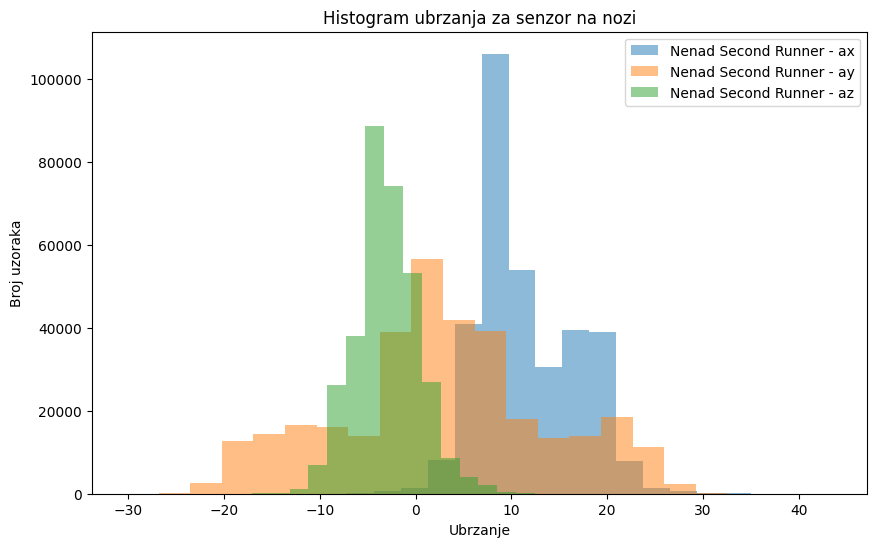

In [186]:
plt.figure(figsize=(10, 6))
for dimenzija in ['ax', 'ay', 'az']:
    plt.hist(leg_data[f'{dimenzija}_Nenad Second Runner'], bins=20, alpha=0.5, label=f'Nenad Second Runner - {dimenzija}')
plt.xlabel('Ubrzanje')
plt.ylabel('Broj uzoraka')
plt.title('Histogram ubrzanja za senzor na nozi')
plt.legend()
plt.show()

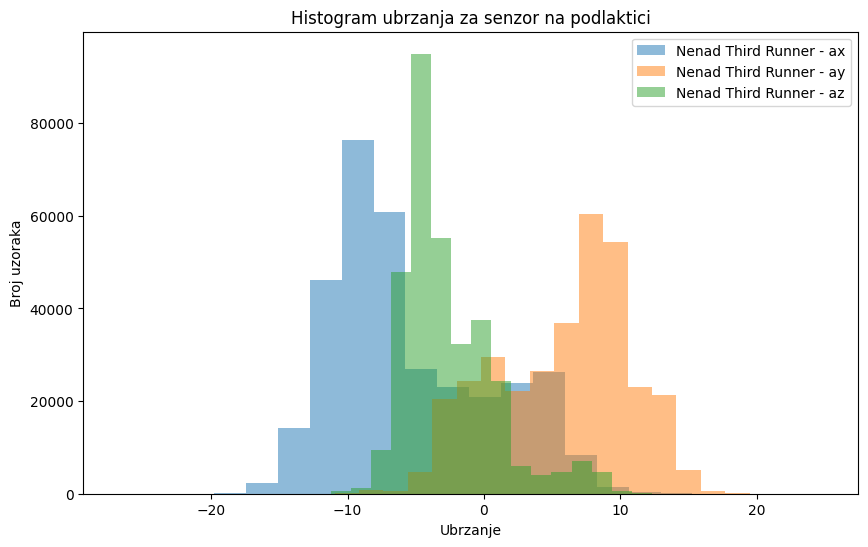

In [188]:
plt.figure(figsize=(10, 6))
for dimenzija in ['ax', 'ay', 'az']:
    plt.hist(arm_data[f'{dimenzija}_Nenad Third Runner'], bins=20, alpha=0.5, label=f'Nenad Third Runner - {dimenzija}')
plt.xlabel('Ubrzanje')
plt.ylabel('Broj uzoraka')
plt.title('Histogram ubrzanja za senzor na podlaktici')
plt.legend()
plt.show()

#### Provera korelacije izmedju podataka

In [158]:
correlation = leg_data['ax_Nenad Second Runner'].corr(arm_data['ax_Nenad Third Runner'])
print("Korelacija između ax_Nenad Second Runner i ax_Nenad Third Runner:", correlation)

Korelacija između ax_Nenad Second Runner i ax_Nenad Third Runner: -0.14719291051981898


In [157]:
correlation = leg_data['ay_Nenad Second Runner'].corr(arm_data['ay_Nenad Third Runner'])
print("Korelacija između ay_Nenad Second Runner i ay_Nenad Third Runner:", correlation)

Korelacija između ay_Nenad Second Runner i ay_Nenad Third Runner: 0.42479751761940787


In [156]:
correlation = leg_data['az_Nenad Second Runner'].corr(arm_data['az_Nenad Third Runner'])
print("Korelacija između az_Nenad Second Runner i az_Nenad Third Runner:", correlation)

Korelacija između az_Nenad Second Runner i az_Nenad Third Runner: 0.10804999110250893


In [171]:
leg_matrix = leg_data.to_numpy()
arm_matrix = arm_data.to_numpy()

correlation_matrix = np.corrcoef(leg_matrix.T, arm_matrix.T)

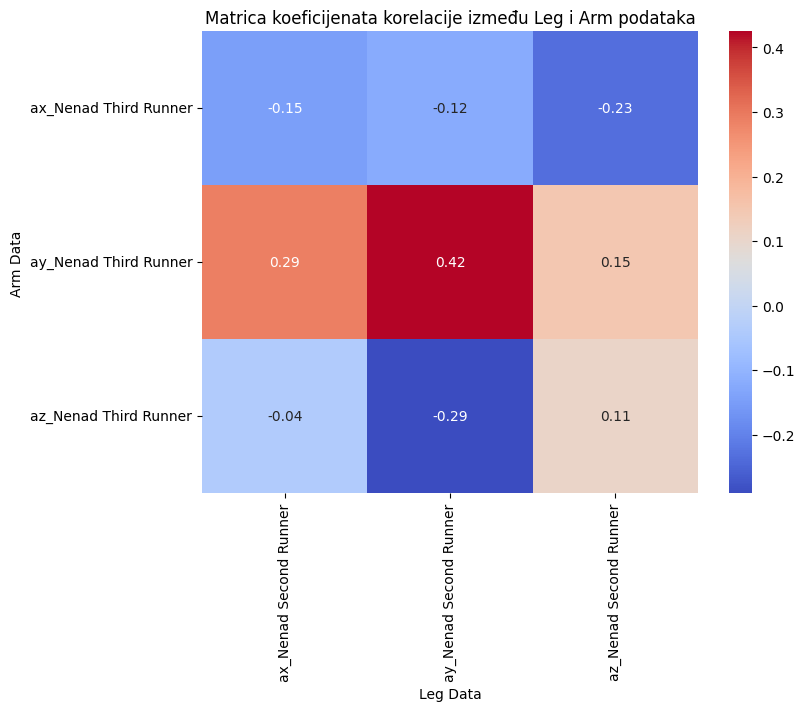

In [175]:
correlation_subset = correlation_matrix[:3, 3:]  

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=leg_data.columns, yticklabels=arm_data.columns)
plt.title("Matrica koeficijenata korelacije između Leg i Arm podataka")
plt.xlabel("Leg Data")
plt.ylabel("Arm Data")
plt.show()

Negativna korelacija između komponenti ubrzanja duž ose x (ax) može ukazivati na to da se pokreti noge (na kojoj je postavljen senzor Second Runner) obično odvijaju u suprotnom smeru u odnosu na pokrete podlaktice (na kojoj je postavljen senzor Third Runner).    

Pozitivna korelacija između komponenti ubrzanja duž ose y (ay) sugeriše da su pokreti koji utiču na ubrzanje duž te ose na nozi (Second Runner senzor) slični pokretima na podlaktici (Third Runner senzor). Ovo može biti zbog činjenice da se oba dela tela često koriste u sinhronizovanim pokretima, poput hodanja ili trčanja.    

Blago pozitivna korelacija između komponenti ubrzanja duž ose z (az) može ukazivati na to da promene u vertikalnom pokretu na nozi (Second Runner senzor) mogu imati minimalan uticaj na promene u vertikalnom pokretu na podlaktici (Third Runner senzor). Ovo može biti zbog različitih funkcija i pokreta između noge i podlaktice.    

### 4. Korak